1\. Write a function that converts number representation (bin<->dec<->hex)

In [4]:
#in ingresso vuole il numero (x), in che base è (base_i) e in che base lo voglio (base_f)
def convertor(x, base_i, base_f):
    if(base_i==10 and base_f==2): #decimal-->binary
        x_f=bin(x)
    
    elif(base_i==10 and base_f==16): #decimal-->hexadecimal
        x_f=hex(x)
        
    elif(base_i==2 and base_f==10):#binary-->decimal
        x_f=int(bin(x),2)
    
    elif(base_i==16 and base_f==10):#hexadecimal-->decimal
        x_f=int(hex(x),16)

    elif(base_i==2 and base_f==16): #binay-->hexadecimal
        x_f=int(bin(x),2)
        x_f=hex(x)

    elif(base_i==16 and base_f==2): #hexadecimal-->binary
        x_f=int(hex(x),16)
        x_f=bin(x)
    print(f"the number {x} in {base_f} is {x_f}")

convertor(3,10,2)

the number 3 in 2 is 0b11


In [ ]:
import math
hex_dictionary = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'a', 11:'b', 12:'c', 13:'d', 14:'e', 15:'f' }

def convertor(x, base_i, base_f):
    return


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [ ]:
from decimal import Decimal

def floaconverter(x): #x deve essere un numero binariodi 32 bits
    bias=127
    s = int(x[0])
    e = str(x[1:9])
    e_dec = int(e, 2)
    i=0
    m=0

    for i in range(23):
        m += int(x[9+i]) * pow(2,-(1+i))

    mantissa = m+1

    f = (-1)**s * mantissa * (pow(2, e_dec - bias))
    return print(m, e_dec, f)
    # return print(len(x))

floaconverter('01000000110101010001111010111000')
floaconverter('11000000100000000000000000000110')

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [ ]:
import sys
sys.float_info
from math import inf
under = 1.0
over = 1.0
flag = True

while(flag):
    old_u = under
    under = under/2
    if(under==0):
        print(f'overflow reached is {old_u}')
        flag=False

flag=True

while(flag):
    old_o = over
    over = over * 2
    if(over==inf):
        print(f'underflow reached is {old_o}')
        flag=False

4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [ ]:
import sys
sys.float_info

flag = True
j = 1.0

while(flag):
    # j = j * 10E-5
    j = j / 1.0000001

    if(j + 1 == 1):
        flag = False
print(j)

5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [ ]:
from numpy import sqrt,sign

def quadsolver(a,b,c):
    x1 = (-b - sqrt(b**2 - 4*a*c)) / (2*a)
    x2 = (-b + sqrt(b**2 - 4*a*c)) / (2*a)
    if(x1==x2): 
        return print(f'the two solution are equal: {x1}')
    else:
        return print(f'With standard formula {x1} e {x2} ')

def quadsolver2(a,b,c):
    x1 = (2*c) / (-b - sqrt(b**2 - 4*a*c))
    x2 = (2*c) / (-b + sqrt(b**2 - 4*a*c))
    if(x1==x2): 
        return print(f'the two solution are equal {x1}')
    else:
        return print(f'whith the rewritten formula {x1} e {x2} ')

def quadsolver3(a,b,c):
    x1= (-b-sign(b)*sqrt(b**2-4*a*c))/(2*a)
    x2= c/(a*x1)
    return print(f'whith the stable formula {x1} e {x2} ')


quadsolver(0.001, 1000, 0.001)
quadsolver2(0.001, 1000.0, 0.001)
quadsolver3(0.001, 1000.0, 0.001)

'''il risultato è diverso! Perché?'''

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

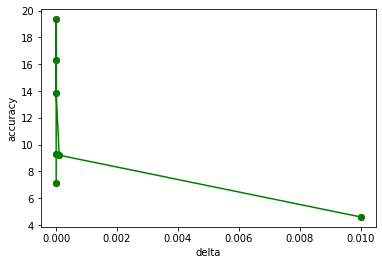

In [1]:
def f(x):
    return x*(x-1)

def derivative(f, x, delta):
    df = (f(x+delta) - f(x)) / delta
    return df

# a = derivative(f,1, 10E-2)
# b = derivative(f, 1, 10E-4)
# c = derivative(f, 1, 10E-6)
# d = derivative(f, 1, 10E-8)
# e = derivative(f, 1, 10E-10)
# g = derivative(f, 1, 10E-12)
# h = derivative(f, 1, 10E-14)
'''numerically unstable'''
# print(a,b,c,d,e,g,h)
# print(a-b)

'''plot of the accuracy scaling with delta.
Accuracy as the residual of x analitic and x by derivative def.'''
import matplotlib.pyplot as plt
import numpy as np
# from matplotlib import pyplot
deltas = [10**(-i) for i in range(1,15) if i%2==0]
analitic_f = 1
accuracy = [np.log(1/abs(1-derivative(f,1,delta))) for delta in deltas]

plt.plot(deltas,accuracy, 'ro')
plt.plot(deltas,accuracy, 'go-')
plt.xlabel('delta')
plt.ylabel('accuracy')
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [2]:
from math import sqrt
import numpy as np
import time

def f(x):
    return sqrt(1-x**2)

N=100
def Riemann(f, N, x1, x2): #where x1 < x2 are the bounds of the integral
    start_time = time.time()
    h = abs(x2-x1)/N
    I = [h*f(k) for k in np.linspace(x1, x2, N)]
    return sum(I), time.time()-start_time

result = np.pi / 2
I, t = Riemann(f, 100, -1, 1)
print(abs(I - result))
print(I,t)
N=100
while(t<=1):
    N*=2
    I,t = Riemann(f, N, -1, 1)
print(I,t)
print(f"the maximum value for N for t<1 is {N}")
print(f"the residual for {N} iteration is {abs(result-I)}")
N=1
while(t<=60):
    N*=2
    I,t = Riemann(f, N, -1, 1)
print(f"After 1 minute {I}")

0.01737839739000102
1.5534179294048955 0.0
1.5707958471454435 1.9609973430633545
the maximum value for N for t<1 is 3276800
the residual for 3276800 iteration is 4.796494530445727e-07
After 1 minute 1.570796315090987
